# Lending Club Credit Risk Modelling

In [97]:
#importing the required libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# set a seaborn style of your taste
sns.set_style("whitegrid")
tls.set_credentials_file(username='bigdatagal',api_key='hvginfgvwe')

In [98]:
#loading the loan dataset
df=pd.read_csv("loan.csv",low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data inspection and Cleaning

In [99]:
#Inspecting the Data Frame
print(df.shape)
print(df.index)
print(df.describe)
print(df.info())
print(df.dtypes)

(39717, 111)
RangeIndex(start=0, stop=39717, step=1)
<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12 

In [100]:
# code for column-wise null percentages
print(round((df.isnull().sum()*100/len(df.index)),2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

#  

We observe that there are few columns which have all the values as NA. We need to discard them as they are of no use

In [101]:
df=df.dropna(axis=1,how='all')

In [102]:
# code for column-wise null percentages
print(round((df.isnull().sum()*100/len(df.index)),2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#  

Intuitively, we observe that certain columns are of less significance and some contains only one unique value. Hence, discarding these columns

Also, we observe that there are few rows which have null values. Hence, deleting such rows

In [103]:
df=df.drop(['id','member_id','open_acc','inq_last_6mths','mths_since_last_delinq','pub_rec','total_acc','out_prncp','funded_amnt_inv','earliest_cr_line','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_credit_pull_d','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','pymnt_plan','url','acc_now_delinq','delinq_amnt','chargeoff_within_12_mths','mths_since_last_record','title','zip_code','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','desc','next_pymnt_d','tax_liens'],axis=1)
df=df[~pd.isnull(df['emp_length'])]

In [104]:
# code for column-wise null percentages
print(round((df.isnull().sum()*100/len(df.index)),2))

loan_amnt               0.00
funded_amnt             0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               3.73
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
revol_util              0.12
pub_rec_bankruptcies    1.80
dtype: float64


#  
'emp_title' might be a free text field on the application form or a list of currated employment titles.
Let’s examine how many unique values exist

In [105]:
print(df.emp_title.value_counts())
df['emp_title'].unique().shape

US Army                                     134
Bank of America                             109
IBM                                          66
AT&T                                         59
Kaiser Permanente                            56
Wells Fargo                                  54
USAF                                         53
UPS                                          53
US Air Force                                 52
Walmart                                      45
Lockheed Martin                              44
United States Air Force                      42
State of California                          42
U.S. Army                                    41
Self Employed                                40
Verizon Wireless                             40
US ARMY                                      39
USPS                                         39
Walgreens                                    38
JP Morgan Chase                              37
Department of Defense                   

(28776,)

#  
We observe that emp_title has 28776 unique values. Hence, it is of not much importance. Hence, dropping this column


We see that emp_length is in string format. We need to convert into numeric type inorder to analyse further. Also, combining the borrowers with emp_length <1 yr and equal to 1 yr

In [106]:
df.drop(columns='emp_title',axis=1)
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
df.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

#  
We need to remove the 'Current' loan status as we dont know whether the borrower will fully pay the loan or get charged off.The current borrowers are not going to give us any significant information going forward

In [107]:
df=df.loc[df['loan_status']!='Current']

#  
We observe that there is 
1)'%' sign in the interest rate and revol_util column.
2) 'months' in the term column
We need to remove it for further calculation

Also, converting the column 'issue_d' into date formate

In [108]:
df.loc[:,'int_rate'] = df['int_rate'].map(lambda x: str(x).split('%')[0])
df['int_rate']=df.int_rate.astype(float)
df.loc[:,'revol_util'] = df['revol_util'].map(lambda x: str(x).split('%')[0])
df['revol_util']=df.revol_util.astype(float)
df['term']=df['term'].map(lambda x: str(x).replace('months','')).astype(int)

df['issue_d']=pd.to_datetime(df["issue_d"], format='%b-%y', yearfirst=False)
df['year']=df['issue_d'].dt.year
print(df.dtypes)
df.shape

loan_amnt                        int64
funded_amnt                      int64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                       int32
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
revol_util                     float64
pub_rec_bankruptcies           float64
year                             int64
dtype: object


(37544, 21)

## Univariate Analysis

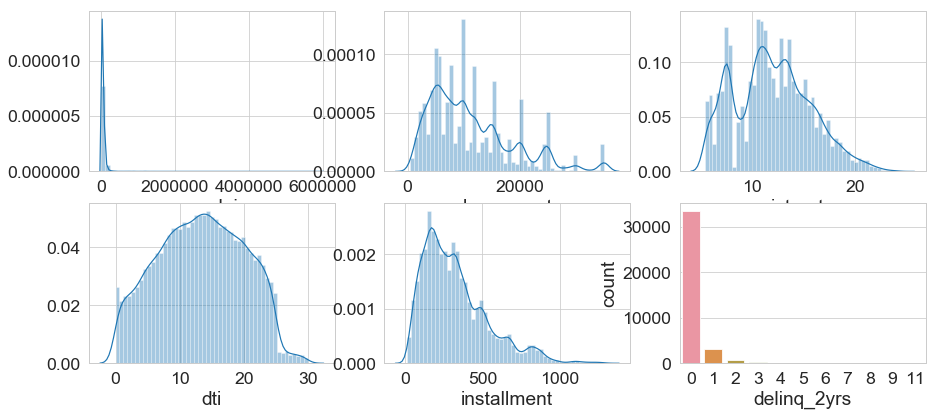

In [109]:
plt.figure(figsize=(15,10))

# subplot 1
plt.subplot(3, 3, 1)
sns.distplot(df['annual_inc'])

# subplot 2
plt.subplot(3, 3, 2)
sns.distplot(df['loan_amnt'])

# subplot 3
plt.subplot(3, 3, 3)
sns.distplot(df['int_rate'])

# subplot 4
plt.subplot(3, 3, 4)
sns.distplot(df['dti'])

# subplot 3
plt.subplot(3, 3, 5)
sns.distplot(df['installment'])

# subplot 4
plt.subplot(3, 3, 6)
sns.countplot(x=df['delinq_2yrs'])

plt.show()


#  
We can clearly see that the distribution of annual income is not uniform or rather is lying in corner . This is because of very large value present in the data. These are called as outliers. We need to remove these as they will give us false statistical results such as mean, median etc. Hence, observing the annual income distribution seperately

Text(0.5, 0, 'Annual Income')

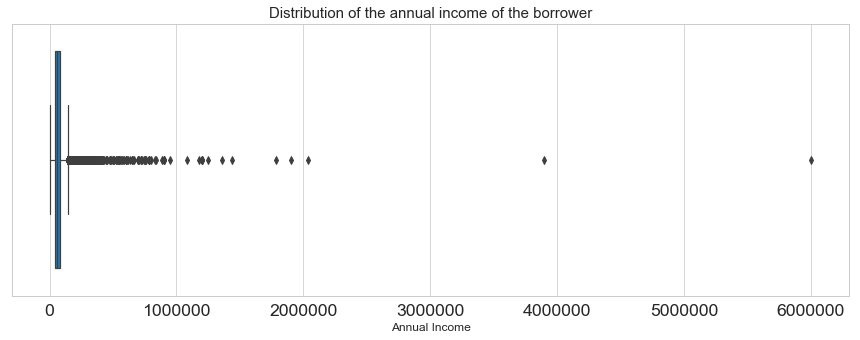

In [110]:
plt.figure(figsize=(15,5))
plt.title('Distribution of the annual income of the borrowers')
sns.boxplot(df['annual_inc'])
plt.title("Distribution of the annual income of the borrower",fontdict=title_font)
plt.xlabel('Annual Income',fontsize=12)

#  
With the help of boxplot, we confirm that there are outliers present in the annual income. Let us examine the annual income further.Also, let us convert the annual income into the thousands range to interpret the data properly

In [111]:
df['annual_inc']=df['annual_inc']/1000
df['annual_inc'].describe(percentiles = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99,1])

count    37544.000000
mean        69.407080
std         64.676984
min          4.000000
0%           4.000000
10%         30.000000
20%         38.000000
30%         45.000000
40%         51.000000
50%         60.000000
60%         66.000000
70%         76.000000
80%         90.000000
90%        116.672400
95%        142.000000
97%        166.213000
99%        235.000000
100%      6000.000000
max       6000.000000
Name: annual_inc, dtype: float64

#  
We see that 99% of the borrowers have income within 235000USD. The last one percent are clearly the outliers.
Hence, going forward working on the details of the borrowers with annual income within 235000USD by dropping the last 1% of the borrowers

In [112]:
df['annual_inc']=df['annual_inc']*1000
df=df.loc[df['annual_inc'] < 235000]

In [113]:
title_font={'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}

Text(0, 0.5, 'Annual Income')

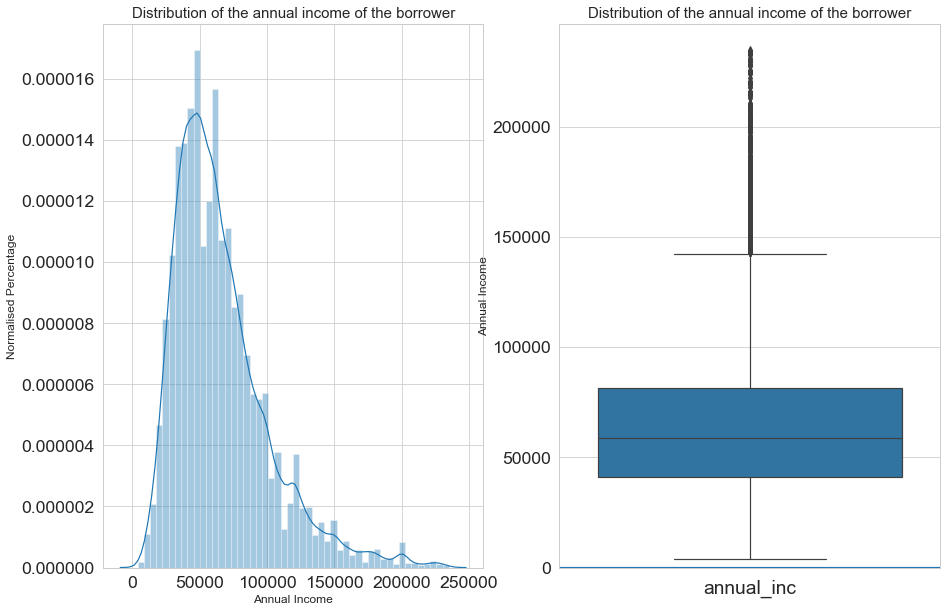

In [114]:
#Checking the distribution of annual income again
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
sns.distplot(df['annual_inc'])
plt.title("Distribution of the annual income of the borrower",fontdict=title_font)
plt.xlabel('Annual Income',fontsize=12)
plt.ylabel('Normalised Percentage',fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['annual_inc'])
sns.distplot(df['annual_inc'])
plt.title("Distribution of the annual income of the borrower",fontdict=title_font)
plt.ylabel('Annual Income',fontsize=12)

count    37165.000000
mean        11.949041
std          3.675502
min          5.420000
25%          8.940000
50%         11.830000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64


Text(0.5, 0, 'Rate of interest')

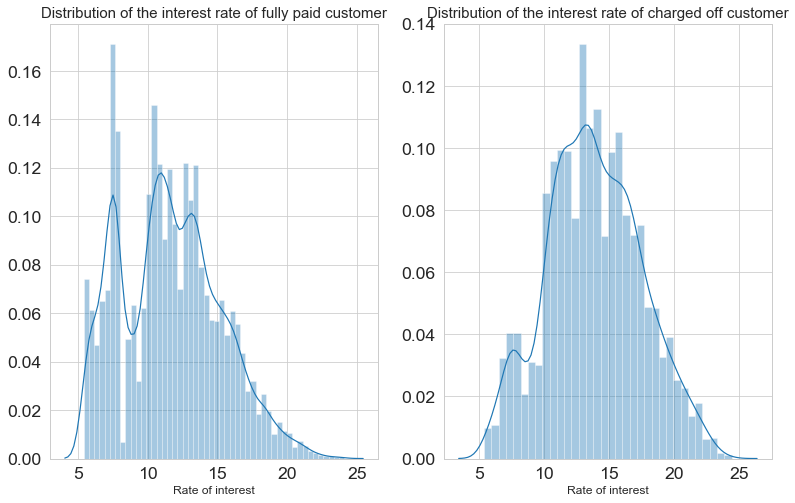

In [115]:
df_fp=df.loc[(df.loan_status=='Fully Paid')]
df_co=df.loc[(df.loan_status=='Charged Off')]

print(df.int_rate.describe())
plt.figure(figsize=(20,8))

plt.subplot(131)
sns.distplot(df_fp['int_rate'])
plt.title("Distribution of the interest rate of fully paid customer",fontdict=title_font)
plt.xlabel('Rate of interest',fontsize=12)

plt.subplot(132)
sns.distplot(df_co['int_rate'])
plt.title("Distribution of the interest rate of charged off customer",fontdict=title_font)
plt.xlabel('Rate of interest',fontsize=12)



#  
We observe that the rate of interest for the defaulters is more. So, it can have two possibilities.
1) Borrowers with high rate of interest tend to default
2) Risky applicants are identified based on their grade and given high rate of interest, so that we can get more returns fast since, the borrower is likely to default

## Statistical details

In [116]:
by_status = df.groupby('loan_status')
by_status_mean = by_status.mean()
by_status_mean

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,year
loan_status,,,,,,,,,,,,
Charged Off,12179.181445,11824.015307,46.344596,13.869591,337.877174,5.195072,60699.96003,14.023760,0.169685,55.734577,0.064492,2010.350009
Fully Paid,10839.236984,10593.173101,41.162475,11.625589,319.385178,5.027980,66779.36112,13.231143,0.142103,47.695202,0.038353,2010.289959


## Categorical and Bivariate Analysis

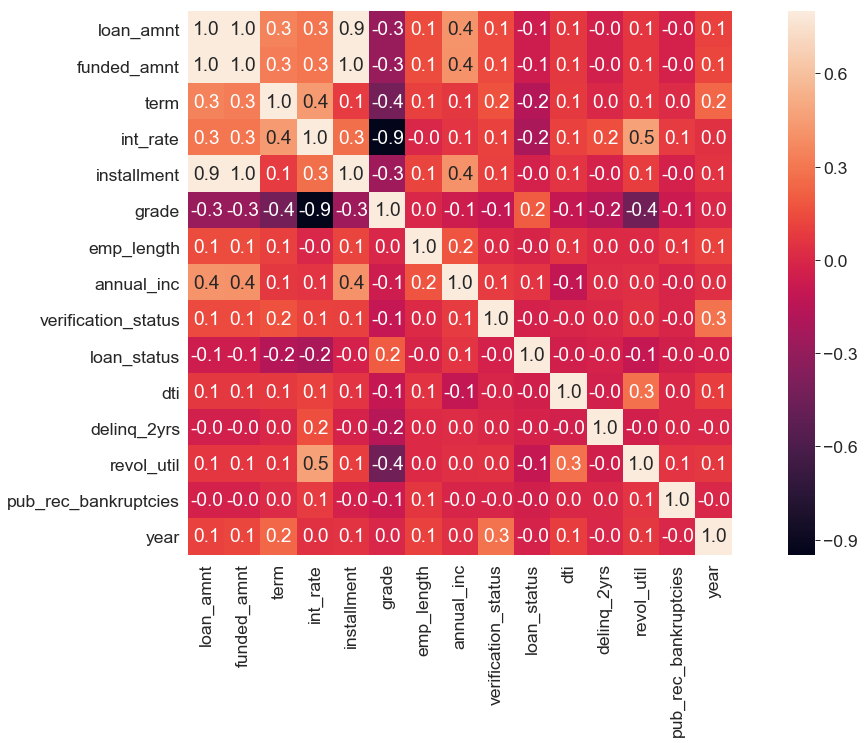

In [117]:
plt.figure(figsize=(20,10))

df_corr = df.copy()
df_corr['grade'] = df_corr['grade'].astype('category')
df_corr['grade'].cat.categories = [6,5,4,3,2,1,0]
df_corr['grade'] = df_corr['grade'].astype('float')

df_corr['verification_status'] = df_corr['verification_status'].astype('category')
df_corr['verification_status'].cat.categories = [0,2,1]
df_corr['verification_status'] = df_corr['verification_status'].astype('float')

ordered_loan_status = ['Charged Off','Current','Fully Paid']
df_corr['loan_status'] = df_corr.loan_status.astype("category",ordered=True,categories=ordered_loan_status).cat.codes
df_corr['loan_status'].value_counts()

sns.set_context("paper", font_scale=2)
sns.heatmap(df_corr.corr(), vmax=.8, square=True, annot=True, fmt='.1f')
plt.show()


#  
Observations from the summary wrt mean and correlation

We observe that on average the annual income is more of fully paid borrowers compared to the defaulters which is obvious. But    when we look at the amount of the loan applied and funded, we see that on average the loan amount of defaulters is more than the fully paying customers.

The rate of interest for the defaulters is more than the ones of the fully paid 

Not much difference in the installment amount

'Debt to Income' ratio for charge off is more than the ones for fully paid which is obvious

Revolving line utilization rate is more for the charged off than the fully paid

We'll analyse these points further based on grades and income

The interest rate is inversely related to the grade(-0.9)

The interest rate is inversely related to the grade (-0.4)

The interest rate is directly related to the rate of interest(0.5)

The installment amount is directly related to the annual income

There is 0.4 correlation between the annual income and the loan amount

We need to analyse these observations from the mean values and correlation further

Text(0, 0.5, 'The annual income of the borrower')

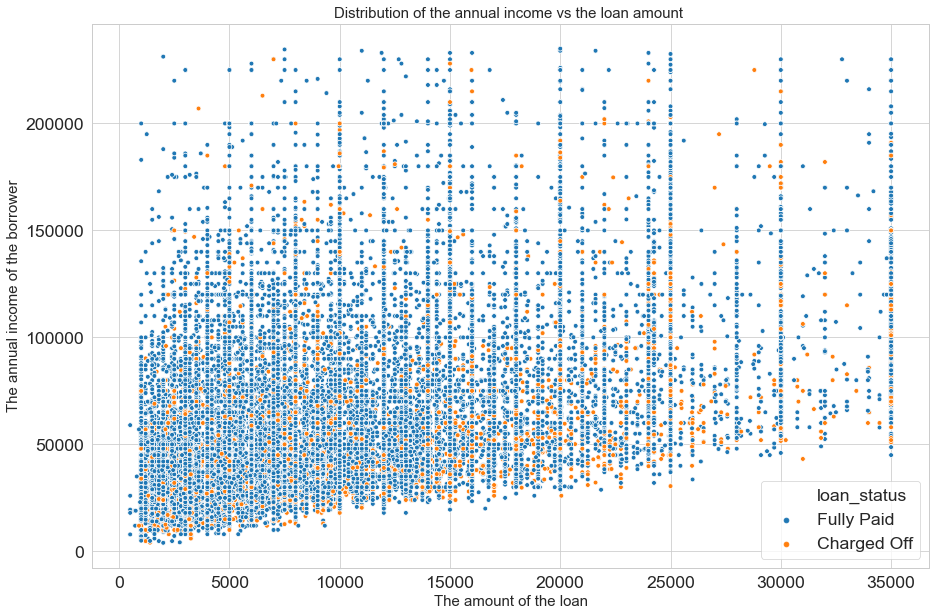

In [118]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='loan_amnt', y='annual_inc',data=df, hue = 'loan_status')
plt.title("Distribution of the annual income vs the loan amount ",fontdict=title_font)
plt.xlabel('The amount of the loan',fontsize=15)
plt.ylabel('The annual income of the borrower',fontsize=15)


#  
From the scatter plot we see that a significant amount of defaulters were observed in the area where the annual income is less and the loan amount is more. Inorder to analyse this case, let us categorise the annual income and loan amount into buckets

In [119]:
#Using pd.cut to create bins
bins1=[0,50000,100000,150000,200000,235000]
income_range=['0-50K','50K-100K','100K-150K','150K-200K','200K-235K']
df['Annual_income_range']=pd.cut(df['annual_inc'],bins1,right=False,labels=income_range)

bins2=[0,5000,10000,15000,20000,25000,30000,35000]
loan_range=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']
df['Loan_amount_range']=pd.cut(df['loan_amnt'],bins2,right=False,labels=loan_range)

In [120]:
#Fully Paid Analysis
fp=df.loc[df['loan_status']=='Fully Paid']
fp_inc_loan = pd.pivot_table(fp,values='annual_inc',index='Loan_amount_range', columns='Annual_income_range', aggfunc='count')

cg=df.loc[df['loan_status']=='Charged Off']
cg_inc_loan = pd.pivot_table(cg,values='annual_inc',index='Loan_amount_range', columns='Annual_income_range', aggfunc='count')

In [121]:
default_rate_inc_loan=pd.DataFrame()
default_rate_inc_loan['% of defaulter in 0-50K']=cg_inc_loan['0-50K']*100/(cg_inc_loan['0-50K']+fp_inc_loan['0-50K'])
default_rate_inc_loan['% of defaulter in 50K-100K ']=cg_inc_loan['50K-100K']*100/(cg_inc_loan['50K-100K']+fp_inc_loan['50K-100K'])
default_rate_inc_loan['% of defaulter in 100K-150K']=cg_inc_loan['100K-150K']*100/(cg_inc_loan['100K-150K']+fp_inc_loan['100K-150K'])
default_rate_inc_loan['% of defaulter in 150K-200K']=cg_inc_loan['150K-200K']*100/(cg_inc_loan['150K-200K']+fp_inc_loan['150K-200K'])
default_rate_inc_loan['% of defaulter in 200K-235K']=cg_inc_loan['200K-235K']*100/(cg_inc_loan['200K-235K']+fp_inc_loan['200K-235K'])
default_rate_inc_loan

,% of defaulter in 0-50K,% of defaulter in 50K-100K,% of defaulter in 100K-150K,% of defaulter in 150K-200K,% of defaulter in 200K-235K
Loan_amount_range,,,,,
0-5K,15.118223,11.191336,7.250755,12.500000,8.333333
5K-10K,15.481411,11.193182,8.370536,8.074534,8.333333
10K-15K,18.073136,11.467577,7.863974,10.447761,1.960784
15K-20K,21.463897,17.476460,9.863429,7.913669,8.928571
20K-25K,25.081433,17.931422,11.501597,12.432432,11.666667
25K-30K,37.142857,21.315193,15.909091,14.000000,12.765957
30K-35K,33.333333,23.706897,20.143885,18.181818,6.250000


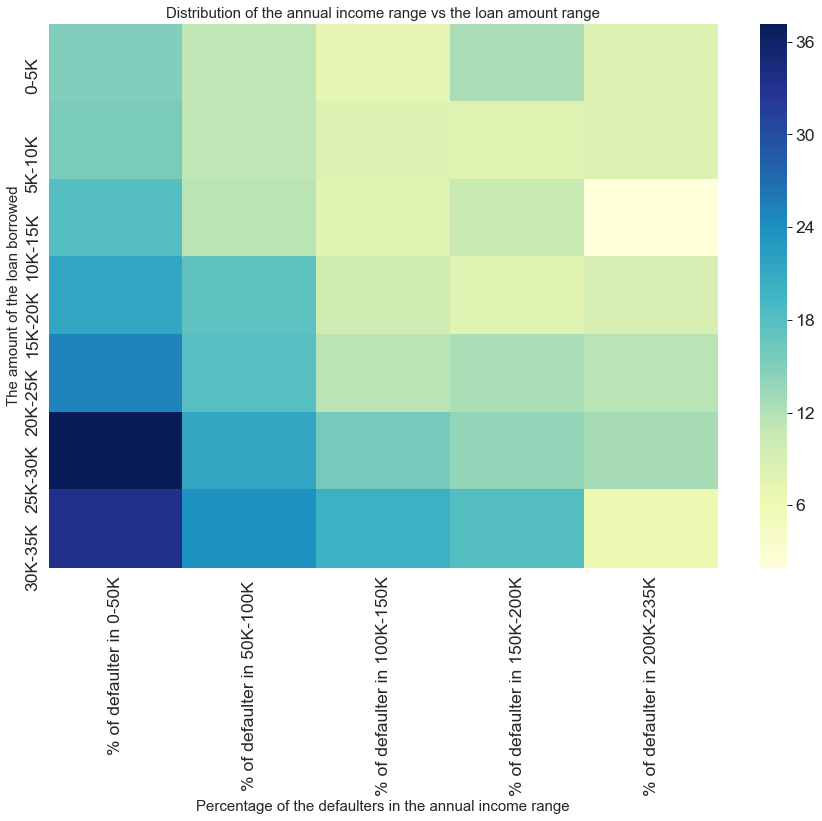

In [122]:
plt.figure(figsize=(15,10))
# heatmap with a color map of choice
sns.heatmap(default_rate_inc_loan, cmap="YlGnBu")
plt.title("Distribution of the annual income range vs the loan amount range",fontdict=title_font)
plt.xlabel('Percentage of the defaulters in the annual income range',fontsize=15)
plt.ylabel('The amount of the loan borrowed',fontsize=15)

plt.show()

#  
From the above heat map, we conclude that the percentage of defaulters is more for less income range and higher loan amount.It indicates that we are lending money to some borrowers beyond their capcity to repay back.Hence, lending club should come up with a certain limit for the amount of loan for the borrowers depending upon important key factors such as dti, revol_util,grade etc

Text(0, 0.5, 'Percentage of defaulters')

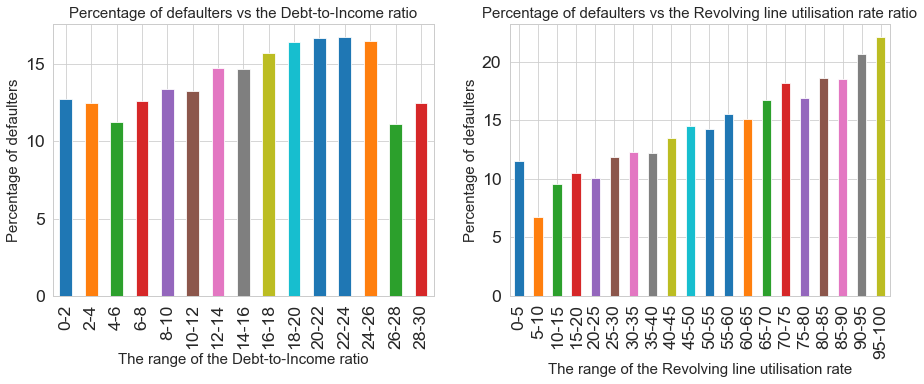

In [123]:
#Using pd.cut to create bins
bins_dti=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
dti_range=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24','24-26','26-28','28-30']
df['Range of dti']=pd.cut(df['dti'],bins_dti,right=False,labels=dti_range)

dti_defaulter=pd.pivot_table(df,index='Range of dti',columns='loan_status',values='annual_inc',aggfunc='count',dropna=False,fill_value=0)
dti_defaulter['Total No of Borrowers']=dti_defaulter['Fully Paid']+dti_defaulter['Charged Off']
dti_defaulter['Percentage of defaulters']=round(dti_defaulter['Charged Off']*100/dti_defaulter['Total No of Borrowers'],2)

#Using pd.cut to create bins
bins_revol=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
revolutil_range=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100']
df['Revolving line utilization rate range']=pd.cut(df['revol_util'],bins_revol,right=False,labels=revolutil_range)

revolutil_defaulter=pd.pivot_table(df,index='Revolving line utilization rate range',columns='loan_status',values='annual_inc',aggfunc='count',dropna=False,fill_value=0)
revolutil_defaulter['Total No of Borrowers']=revolutil_defaulter['Fully Paid']+revolutil_defaulter['Charged Off']
revolutil_defaulter['Percentage of defaulters']=round(revolutil_defaulter['Charged Off']*100/revolutil_defaulter['Total No of Borrowers'],2)

plt.figure(figsize=(15,5))
plt.subplot(121)
dti_defaulter['Percentage of defaulters'].plot(kind='bar')
plt.title("Percentage of defaulters vs the Debt-to-Income ratio",fontdict=title_font)
plt.xlabel('The range of the Debt-to-Income ratio',fontsize=15)
plt.ylabel('Percentage of defaulters',fontsize=15)

plt.subplot(122)
revolutil_defaulter['Percentage of defaulters'].plot(kind='bar')
plt.title("Percentage of defaulters vs the Revolving line utilisation rate ratio",fontdict=title_font)
plt.xlabel('The range of the Revolving line utilisation rate',fontsize=15)
plt.ylabel('Percentage of defaulters',fontsize=15)

#  
We observe that as the Debt-to-Inccome ratio and the revolving line utilization rate increases,the percentage of defaulters increases. Hence, based on these factors we can identify risky applicants

Text(0, 0.5, 'Percentage of Defaulters')

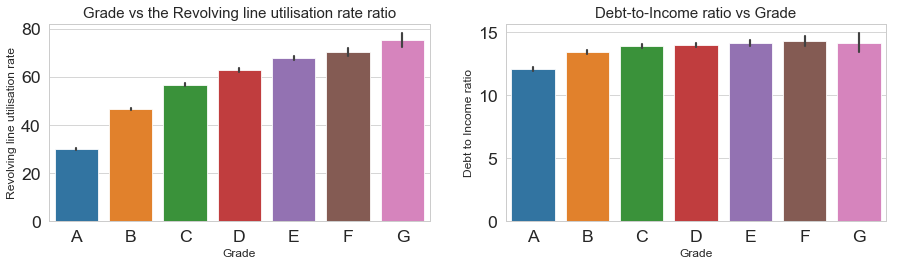

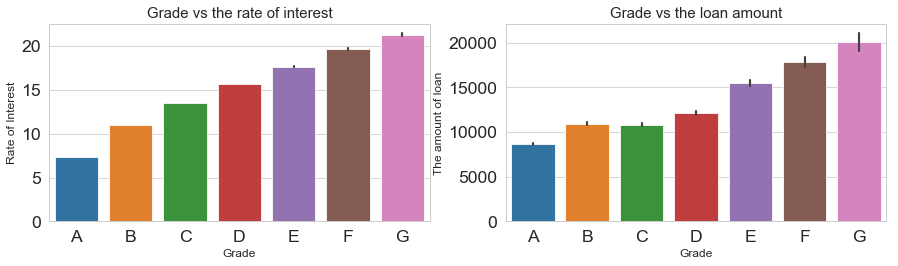

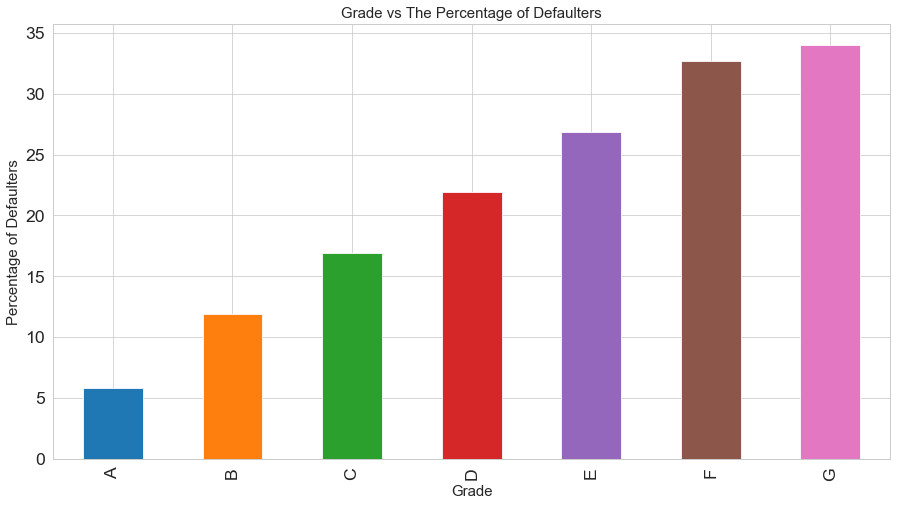

In [124]:
grade_defaulter=pd.pivot_table(df,index='grade',columns='loan_status',values='annual_inc',aggfunc='count',dropna=False,fill_value='NA')
grade_defaulter['Total No of Borrowers']=grade_defaulter['Fully Paid']+grade_defaulter['Charged Off']
grade_defaulter['Percentage of defaulters']=round(grade_defaulter['Charged Off']*100/grade_defaulter['Total No of Borrowers'],2)

plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x='grade',y='revol_util',order=['A','B','C','D','E','F','G'],data=df)
plt.title("Grade vs the Revolving line utilisation rate ratio",fontdict=title_font)
plt.xlabel('Grade',fontsize=12)
plt.ylabel('Revolving line utilisation rate',fontsize=12)


plt.subplot(222)
sns.barplot(x='grade',y='dti',order=['A','B','C','D','E','F','G'],data=df)
plt.title("Debt-to-Income ratio vs Grade",fontdict=title_font)
plt.xlabel('Grade',fontsize=12)
plt.ylabel('Debt to Income ratio',fontsize=12)

plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x='grade',y='int_rate',order=['A','B','C','D','E','F','G'],data=df)
plt.title("Grade vs the rate of interest",fontdict=title_font)
plt.xlabel('Grade',fontsize=12)
plt.ylabel('Rate of Interest',fontsize=12)

plt.subplot(222)
sns.barplot(x='grade',y='loan_amnt',order=['A','B','C','D','E','F','G'],data=df)
plt.title("Grade vs the loan amount",fontdict=title_font)
plt.xlabel('Grade',fontsize=12)
plt.ylabel('The amount of loan',fontsize=12)

plt.figure(figsize=(15,8))
plt.subplot(111)
grade_defaulter['Percentage of defaulters'].plot(kind='bar')
plt.title("Grade vs The Percentage of Defaulters",fontdict=title_font)
plt.xlabel('Grade',fontsize=15)
plt.ylabel('Percentage of Defaulters',fontsize=15)


#  
We observed that the Revolving line utilization rate,dti is increasing the grade of the borrower decreases. Hence, lower grade borrowers are likely to default. Hence, inorer to avoid mojor losses, the rate of interest for such applicants is high.
We see that as the grade reduces, the amount of loan is increasing which is very risky. Highly risky applicants should not be more amount of loan as their dti is more,the amount of credit the borrower is using relative to all available revolving credit is more.Giving large amount of loans to highly risky people should be avoided.As expected, we see in the last plot that, due to poor dti,revolving line utilisation rate,the percentage of defaulters increases

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7987.522442,11000.297398,11143.686672,12236.746988,15765.711176,18996.241830,18604.081633
Fully Paid,8682.104914,10934.307599,10738.643571,12043.611762,15421.740287,17251.862124,20827.105263


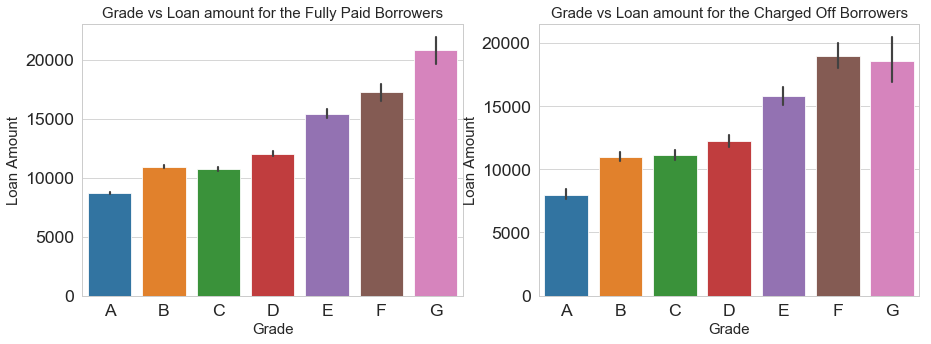

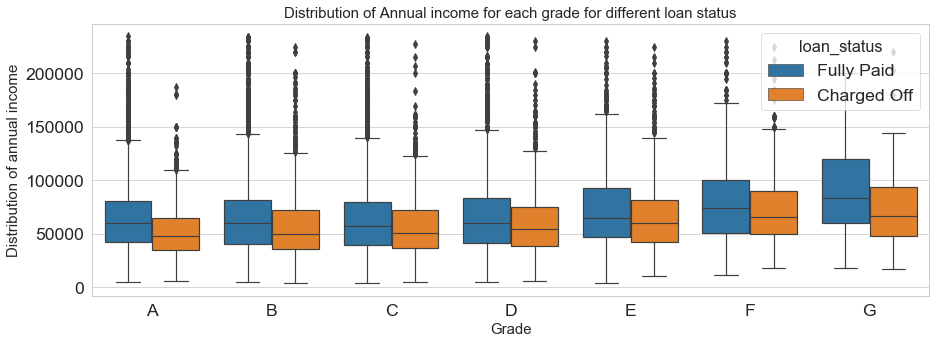

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='grade', y='loan_amnt',order=['A','B','C','D','E','F','G'], data=df_fp)
plt.title("Grade vs Loan amount for the Fully Paid Borrowers",fontdict=title_font)
plt.xlabel('Grade',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)

plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt',order=['A','B','C','D','E','F','G'], data=df_co)
plt.title("Grade vs Loan amount for the Charged Off Borrowers",fontdict=title_font)
plt.xlabel('Grade',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)

df.pivot_table( values='term',index = 'loan_status', columns = 'grade', aggfunc='count')
plt.figure(figsize=(15,5))
sns.boxplot(x='grade', y='annual_inc',hue='loan_status',order=['A','B','C','D','E','F','G'], data=df)
plt.title("Distribution of Annual income for each grade for different loan status",fontdict=title_font)
plt.xlabel('Grade',fontsize=15)
plt.ylabel('Distribution of annual income',fontsize=15)

df.pivot_table( values='loan_amnt',index = 'loan_status', columns = 'grade', aggfunc='mean')

#  
As the grade decreases, the amount of loan increases.Hence, more no of applications on the riskier side. Lending Club need to take care of this by applying more rules for ensuring the repayment of the loan. 

Also, from the pivot table, we can see that not much difference in loan amount for different grades. But, for all the grades the annual income for fully paid is more than the default

Text(0, 0.5, 'Rate of interest')

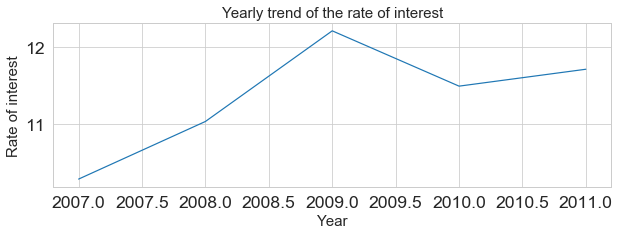

In [126]:
plt.figure(figsize=(10,3))
plt.title('Interest rate movement-YOY')
df.groupby('year').int_rate.median().plot()
plt.title("Yearly trend of the rate of interest",fontdict=title_font)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Rate of interest',fontsize=15)

Text(0, 0.5, 'No of Borrowers')

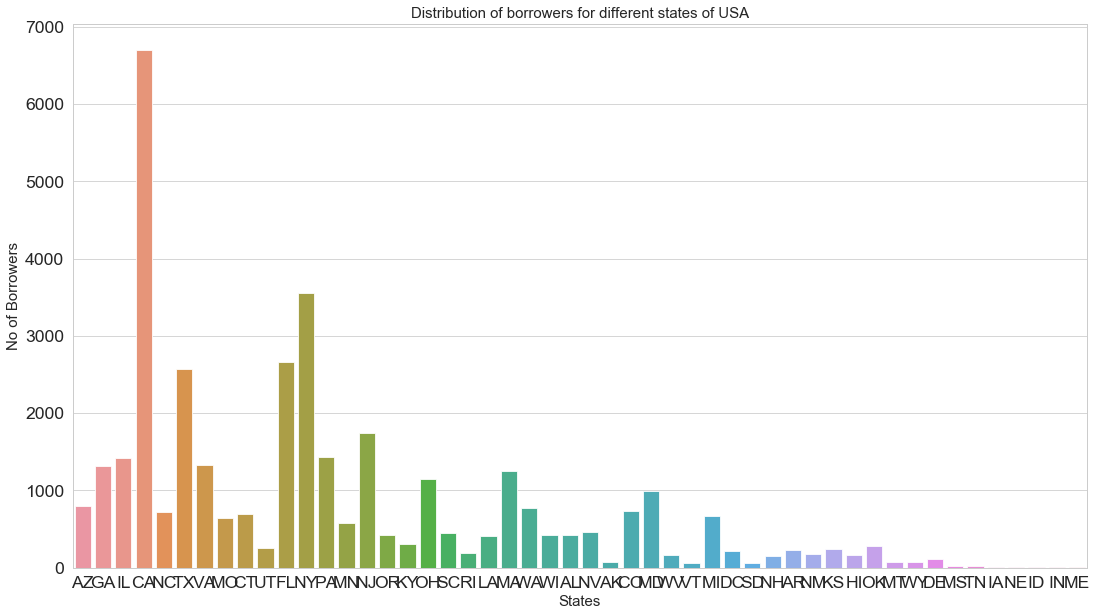

In [127]:
plt.figure(figsize=(40,10))
plt.subplot(121)
plt.title('Statewise loan status count',fontsize=20)
sns.countplot(x='addr_state', data=df)
plt.title("Distribution of borrowers for different states of USA",fontdict=title_font)
plt.xlabel('States',fontsize=15)
plt.ylabel('No of Borrowers',fontsize=15)

debt_consolidation    47.0
credit_card           13.0
other                 10.0
home_improvement       7.0
major_purchase         6.0
small_business         5.0
car                    4.0
wedding                2.0
medical                2.0
moving                 1.0
vacation               1.0
house                  1.0
educational            1.0
renewable_energy       0.0
Name: purpose, dtype: float64 2


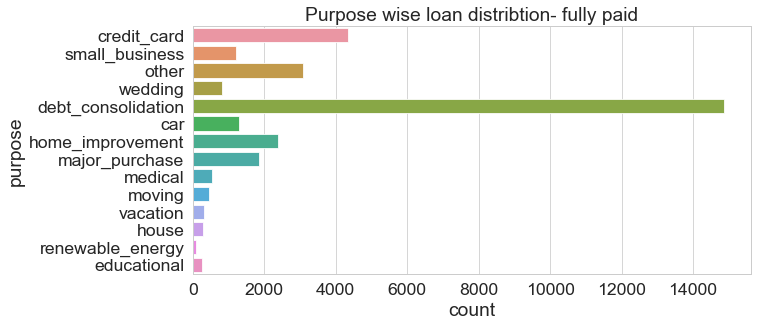

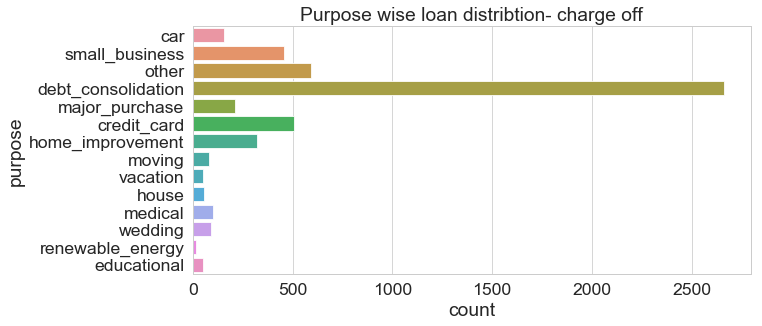

In [128]:
print(round(df.purpose.value_counts(normalize=True)*100),2)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Purpose wise loan distribtion- fully paid')
sns.countplot(y="purpose", data=df_fp)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Purpose wise loan distribtion- charge off')
sns.countplot(y="purpose", data=df_co)
cm = sns.light_palette("red", as_cmap=True)
purpose_df=pd.crosstab(df['purpose'], df['loan_status']).style.background_gradient(cmap = cm)

Text(0.5, 0, 'No of Borrowers')

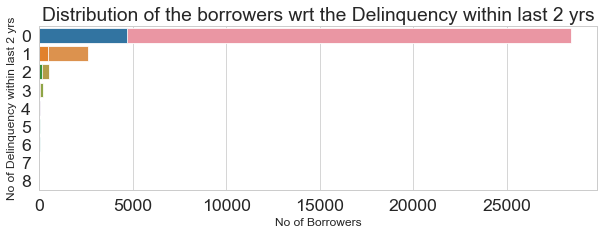

In [129]:
plt.figure(figsize=(10,3))
sns.countplot(y='delinq_2yrs', data=df_fp)
sns.countplot(y='delinq_2yrs', data=df_co)

df.pivot_table( values='term',index = 'loan_status', columns = 'delinq_2yrs', aggfunc='count')
plt.title('Distribution of the borrowers wrt the Delinquency within last 2 yrs')
plt.ylabel('No of Delinquency within last 2 yrs',fontsize=12)
plt.xlabel('No of Borrowers',fontsize=12)

#  
We see that there are more no of borrowers with deliquency within 2yrs eual to 0. For borrowers with delinquency more than 0,have high no of defaulters compared to that with 0. Hence, borrowers with delinquency greater than 0 for the within last to years are risky applicants

Text(0, 0.5, 'No of Borrowers')

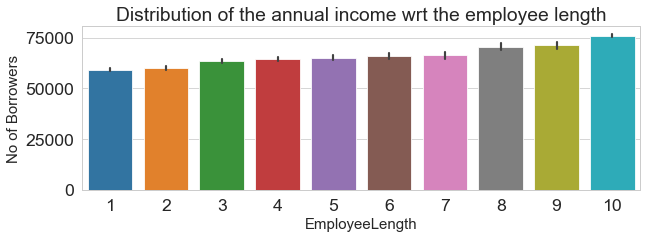

In [130]:
plt.figure(figsize=(10,3))
sns.barplot(y='annual_inc',x='emp_length',data=df)
plt.title('Distribution of the annual income wrt the employee length')
plt.xlabel('EmployeeLength',fontsize=15)
plt.ylabel('No of Borrowers',fontsize=15)

#  
From above graph we see that borrowers with more experience have more income. Hence they are more likely to repay the loan than people with less experience and less income. But, again the risk calculating factors should also be given importance before gicing loan

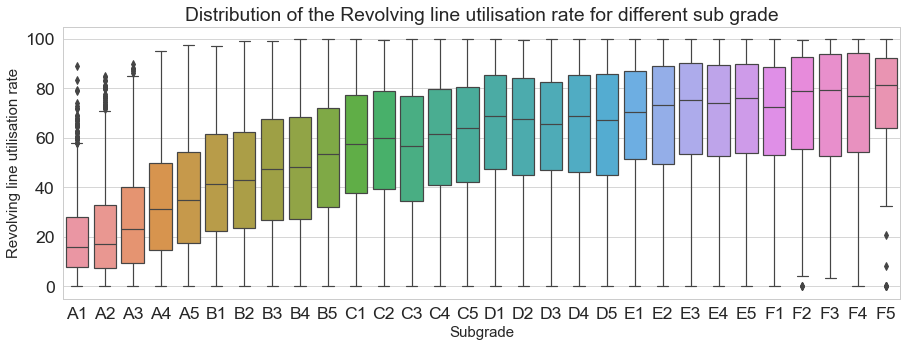

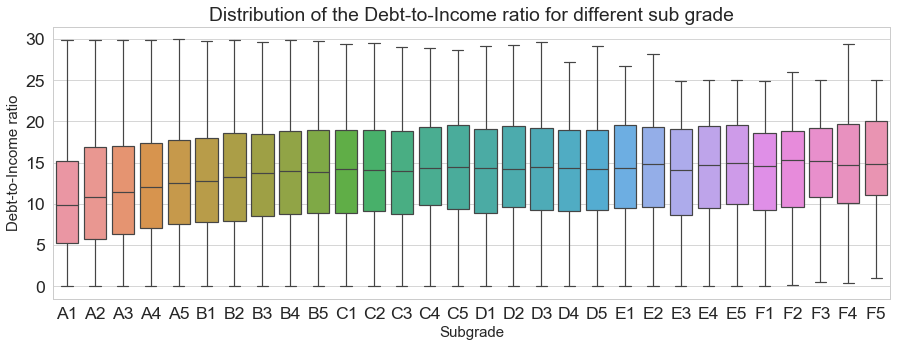

Text(0, 0.5, 'Percentage ofDefaulters')

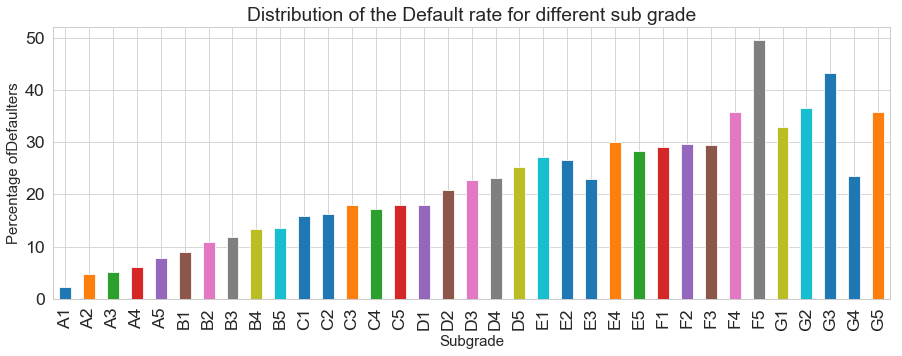

In [131]:
plt.figure(figsize=(15,5))
order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5']
sns.boxplot(x='sub_grade',y='revol_util',order=order,data=df)
plt.title('Distribution of the Revolving line utilisation rate for different sub grade')
plt.xlabel('Subgrade',fontsize=15)
plt.ylabel('Revolving line utilisation rate',fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='sub_grade',y='dti',order=order,data=df)
plt.title('Distribution of the Debt-to-Income ratio for different sub grade')
plt.xlabel('Subgrade',fontsize=15)
plt.ylabel('Debt-to-Income ratio',fontsize=15)
plt.show()

sub_grade_defaulter=pd.pivot_table(df,index='sub_grade',columns='loan_status',values='annual_inc',aggfunc='count',dropna=False,fill_value='NA')
sub_grade_defaulter['Total No of Borrowers']=sub_grade_defaulter['Fully Paid']+sub_grade_defaulter['Charged Off']
sub_grade_defaulter['Percentage of defaulters']=round(sub_grade_defaulter['Charged Off']*100/sub_grade_defaulter['Total No of Borrowers'],2)
plt.figure(figsize=(15,5))
sub_grade_defaulter['Percentage of defaulters'].plot(kind='bar')
plt.title('Distribution of the Default rate for different sub grade')
plt.xlabel('Subgrade',fontsize=15)
plt.ylabel('Percentage ofDefaulters',fontsize=15)